# Librerie

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
import nltk
import sklearn

from transformers import RobertaTokenizer
from sacremoses import MosesTokenizer

from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tokenizer.text_cleaning import clean_text
from tokenizer.bpe import BPEPipeline, BPE
from tokenizer.MosesTokenizer import MosesTokenizationPipeline

In [23]:
from tokenizer.bpe import BpeRobertaPipeline
from tokenizer.XLNtokenizer import XLNetTokenization
from tokenizer.morfessor_tokenizator import MorfessorTokenizationPipeline

In [24]:
def apply_bpe_to_series(series):
    return series.apply(bpe_pipeline.transform)

## Importazione dataset

In [25]:
train_set = pd.read_csv('dataset/train.csv')
test_set = pd.read_csv("dataset/test.csv")

## Analisi preliminari 

In [26]:
train_set.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [27]:
target_category = train_set['Class Index'].unique()
print(target_category)

[3 4 2 1]


In [28]:
category = train_set[["Class Index"]].drop_duplicates().sort_values('Class Index')
category

,Class Index
492,1
448,2
0,3
78,4


In [29]:
train_set.groupby('Class Index').Description.count()

Class Index
1    30000
2    30000
3    30000
4    30000
Name: Description, dtype: int64

<AxesSubplot:xlabel='Class Index'>

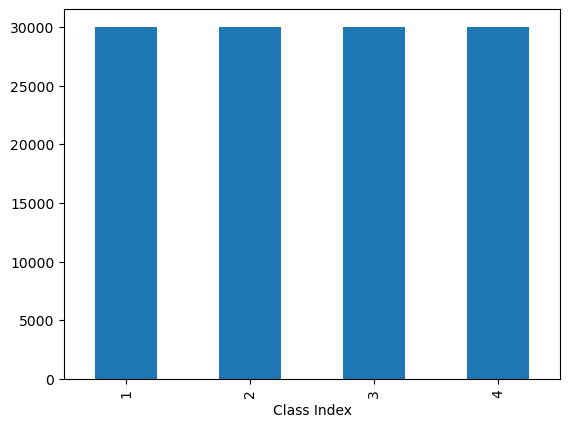

In [30]:
train_set.groupby('Class Index').Description.count().plot.bar(ylim=0)

In [20]:
train_set

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


## White space 

In [33]:
#WHITE

def list_to_string(df, source_column, new_column):
    """
    Converte una lista di parole in una colonna del DataFrame in una stringa unica.
    
    Args:
    df (pandas.DataFrame): DataFrame che contiene la colonna di liste di parole.
    source_column (str): Nome della colonna da cui prendere le liste di parole.
    new_column (str): Nome della nuova colonna con il testo convertito in stringa.

    Returns:
    pandas.DataFrame: DataFrame con la nuova colonna aggiunta.
    """
    # Verifica che la colonna esista nel DataFrame
    if source_column not in df.columns:
        raise ValueError(f"La colonna {source_column} non esiste nel DataFrame fornito.")

    # Converte ogni lista di parole in una stringa unica
    df[new_column] = df[source_column].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

    return df

# Applica la funzione al tuo DataFrame
clean_func = clean_text('Description')
train_set['cleaned_text'] = train_set['Description'].apply(clean_func)
train_set = list_to_string(train_set, 'cleaned_text', 'text_w')
test_set['cleaned_text'] = test_set['Description'].apply(clean_func)
test_set=list_to_string(train_set, 'cleaned_text', 'text_w')

# Visualizza le prime righe per vedere il risultato
print(test_set['text_w'].head())

0    reuters short sellers wall street dwindling ba...
1    reuters private investment firm carlyle group ...
2    reuters soaring crude prices plus worries econ...
3    reuters authorities halted oil export flows ma...
4    afp tearaway world oil prices toppling records...
Name: text_w, dtype: object


In [14]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(train_set['text_w'],train_set['Class Index'])

test_predict = nb.predict(test_set['text_w'])

train_accuracy = round(nb.score(train_set['text_w'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, train_set['Class Index'])*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
# Supponiamo che target_category sia attualmente un array numerico o una lista di numeri
# Convertilo in una lista di stringhe
target_category = [str(name) for name in target_category]

# Ora usa questa lista modificata nel classification_report
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))


Naive Bayes Train Accuracy Score : 91% 
Naive Bayes Test Accuracy Score  : 91% 

              precision    recall  f1-score   support

           3       0.90      0.92      0.91     29221
           4       0.98      0.95      0.97     30836
           2       0.88      0.88      0.88     30081
           1       0.89      0.89      0.89     29862

    accuracy                           0.91    120000
   macro avg       0.91      0.91      0.91    120000
weighted avg       0.91      0.91      0.91    120000



In [ ]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(train_set['text_w'],train_set['text_w'])

test_predict = dt.predict(test_set['text_w'])

train_accuracy = round(dt.score(train_set['text_w'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

## Matrice di confusione 

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Per una visualizzazione più attraente della matrice di confusione

# Calcola la matrice di confusione
conf_matrix = confusion_matrix(test_set_bpe['Class Index'], test_predict)

# Usa Seaborn per creare una heatmap della matrice di confusione
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=target_category, yticklabels=target_category)

# Aggiungi titoli e etichette
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()


NameError: name 'test_predict' is not defined

## Decision tree 

In [ ]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(train_set['text_w'],train_set['Class Index'])

test_predict = dt.predict(test_set['text_w'])

train_accuracy = round(dt.score(train_set['text_w'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

## Random forest 

In [ ]:
rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100)),
               ])

rfc.fit(train_set['text_w'],train_set['Class Index'])

test_predict = rfc.predict(test_set['text_w'])

train_accuracy = round(rfc.score(train_set['text_w'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy ))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

## BPE 

In [50]:
#Addestro tokenizzatore
#corpus = train_set['Title']

#vocab_size = 1000

#bpe_pipeline = BPEPipeline(vocab_size)
#bpe_pipeline.fit(corpus)

#test_set['cleaned_text'] = test_set['Description'].apply(clean_func)
#test_set.head()

#test_set['Text_BPE'] = apply_bpe_to_series(test_set['cleaned_text'])
#test_set['Text_BPE'].head()

#test_set['Text_BPE'] = test_set['Text_BPE'].apply(lambda x: ' '.join(x))

In [31]:
# Per questioni di comodità si importano i dataset con la tokenizzazione bpe già effettuata
train_set_bpe = pd.read_csv('dataset/train_set_bpe.csv')
test_set_bpe = pd.read_csv("dataset/test_set_bpe.csv")
test_set_bpe.head()

,Class Index,Title,Description,cleaned_text,Text_BPE,Text_BPE1
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,unions representing workers turner newall say ...,"['un', 'ions', 'Ġre', 'p', 'res', 'ent', 'ing'...",un ions Ġre p res ent ing Ġw ork ers Ġt urn er...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",space com toronto canada second team rocketeer...,"['s', 'p', 'ace', 'Ġc', 'om', 'Ġt', 'or', 'on'...",s p ace Ġc om Ġt or on to Ġc anad a Ġs econd Ġ...
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,ap company founded chemistry researcher univer...,"['ap', 'Ġcomp', 'an', 'y', 'Ġf', 'ound', 'ed',...",ap Ġcomp an y Ġf ound ed Ġc he m ist ry Ġres e...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,ap barely dawn mike fitzpatrick starts shift b...,"['ap', 'Ġb', 'ar', 'ely', 'Ġd', 'aw', 'n', 'Ġm...",ap Ġb ar ely Ġd aw n Ġm i ke Ġf it z p at ric ...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,ap southern california smog fighting agency we...,"['ap', 'Ġs', 'out', 'her', 'n', 'Ġc', 'al', 'i...",ap Ġs out her n Ġc al if orn ia Ġs m og Ġf igh...


# Naive Bayes

In [54]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(train_set_bpe['Text_BPE1'],train_set_bpe['Class Index'])

test_predict = nb.predict(test_set_bpe['Text_BPE1'])

train_accuracy = round(nb.score(train_set_bpe['Text_BPE1'],train_set_bpe['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set_bpe['Class Index'])*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
# Supponiamo che target_category sia attualmente un array numerico o una lista di numeri
# Convertilo in una lista di stringhe
target_category = [str(name) for name in target_category]

# Ora usa questa lista modificata nel classification_report
print(classification_report(test_predict, test_set_bpe['Class Index'], target_names=target_category))


Naive Bayes Train Accuracy Score : 80% 
Naive Bayes Test Accuracy Score  : 80% 

              precision    recall  f1-score   support

           3       0.81      0.83      0.82      1849
           4       0.90      0.83      0.86      2068
           2       0.73      0.78      0.75      1784
           1       0.75      0.75      0.75      1899

    accuracy                           0.80      7600
   macro avg       0.80      0.80      0.80      7600
weighted avg       0.80      0.80      0.80      7600



## Decision tree

In [55]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(train_set_bpe['Text_BPE1'],train_set_bpe['Class Index'])

test_predict = dt.predict(test_set_bpe['Text_BPE1'])

train_accuracy = round(dt.score(train_set_bpe['Text_BPE1'],train_set_bpe['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set_bpe['Class Index'])*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set_bpe['Class Index'], target_names=target_category))

Decision Tree Train Accuracy Score : 100% 
Decision Tree Test Accuracy Score  : 70% 

              precision    recall  f1-score   support

           3       0.73      0.72      0.72      1920
           4       0.75      0.77      0.76      1857
           2       0.64      0.65      0.65      1848
           1       0.67      0.64      0.66      1975

    accuracy                           0.70      7600
   macro avg       0.70      0.70      0.70      7600
weighted avg       0.70      0.70      0.70      7600



## Random forest

In [56]:
rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100)),
               ])

rfc.fit(train_set_bpe['Text_BPE1'],train_set_bpe['Class Index'])

test_predict = rfc.predict(test_set_bpe['Text_BPE1'])

train_accuracy = round(rfc.score(train_set_bpe['Text_BPE1'],train_set_bpe['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set_bpe['Class Index'])*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy ))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set_bpe['Class Index'], target_names=target_category))

K-Nearest Neighbour Train Accuracy Score : 100% 
K-Nearest Neighbour Test Accuracy Score  : 83% 

              precision    recall  f1-score   support

           3       0.82      0.86      0.84      1813
           4       0.92      0.85      0.88      2073
           2       0.76      0.83      0.79      1755
           1       0.80      0.78      0.79      1959

    accuracy                           0.83      7600
   macro avg       0.83      0.83      0.83      7600
weighted avg       0.83      0.83      0.83      7600



# BPE Roberta

In [61]:
# Applicazione metodo bpe Roberta
pipeline = BpeRobertaPipeline()
train_set['Text_BPER'] = pipeline.apply_pipeline(train_set, 'cleaned_text')
test_set['Text_BPER']=pipeline.apply_pipeline(test_set, 'cleaned_text')

,Class Index,Title,cleaned_text,Text_BPE1,Text_BPER
0,3,Wall St. Bears Claw Back Into the Black (Reuters),reuters short sellers wall street dwindling ba...,re uters Ġsh ort Ġs ell ers Ġw all Ġst re et Ġ...,re uters Ġshort Ġsellers Ġwall Ġstreet Ġdwindl...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,reuters private investment firm carlyle group ...,re uters Ġp riv ate Ġin vest ment Ġf irm Ġc ar...,re uters Ġprivate Ġinvestment Ġfirm Ġcar ly le...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),reuters soaring crude prices plus worries econ...,re uters Ġs o ar ing Ġcr ud e Ġprices Ġpl us Ġ...,re uters Ġsoaring Ġcrude Ġprices Ġplus Ġworrie...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,reuters authorities halted oil export flows ma...,re uters Ġa ut h or it ies Ġh al t ed Ġoil Ġex...,re uters Ġauthorities Ġhalted Ġoil Ġexport Ġfl...
4,3,"Oil prices soar to all-time record, posing new...",afp tearaway world oil prices toppling records...,af p Ġt ear aw ay Ġw orld Ġoil Ġprices Ġto pp ...,af p Ġtear away Ġworld Ġoil Ġprices Ġtopp ling...
...,...,...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,karachi reuters pakistani president pervez mus...,k ar ach i Ġre uters Ġp akistan i Ġp resident ...,kar achi Ġre uters Ġp ak istani Ġpresident Ġpe...
119996,2,Renteria signing a top-shelf deal,red sox general manager theo epstein acknowled...,red Ġs ox Ġg en er al Ġman ag er Ġthe o Ġe p s...,red Ġso x Ġgeneral Ġmanager Ġthe o Ġep stein Ġ...
119997,2,Saban not going to Dolphins yet,miami dolphins put courtship lsu coach nick sa...,m i am i Ġd ol ph ins Ġp ut Ġc our ts hip Ġl s...,m iami Ġdolphins Ġput Ġcourts hip Ġl su Ġcoach...
119998,2,Today's NFL games,pittsburgh ny giants time line steelers record...,p it ts b ur g h Ġn y Ġg ian ts Ġt ime Ġl ine ...,p itt sburgh Ġn y Ġgiants Ġtime Ġline Ġsteel e...


## Naive Bayes

In [64]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(train_set['Text_BPER'],train_set['Class Index'])

test_predict = nb.predict(test_set['Text_BPER'])

train_accuracy = round(nb.score(train_set['Text_BPER'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
# Supponiamo che target_category sia attualmente un array numerico o una lista di numeri
# Convertilo in una lista di stringhe
target_category = [str(name) for name in target_category]

# Ora usa questa lista modificata nel classification_report
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))


Naive Bayes Train Accuracy Score : 90% 
Naive Bayes Test Accuracy Score  : 89% 

              precision    recall  f1-score   support

           3       0.88      0.91      0.89      1851
           4       0.97      0.92      0.95      1993
           2       0.84      0.86      0.85      1857
           1       0.86      0.86      0.86      1899

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



## Decision tree

In [66]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(train_set['Text_BPER'],train_set['Class Index'])

test_predict = dt.predict(test_set['Text_BPER'])

train_accuracy = round(dt.score(train_set['Text_BPER'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

Decision Tree Train Accuracy Score : 100% 
Decision Tree Test Accuracy Score  : 79% 

              precision    recall  f1-score   support

           3       0.80      0.79      0.80      1945
           4       0.85      0.85      0.85      1904
           2       0.74      0.75      0.74      1881
           1       0.75      0.76      0.75      1870

    accuracy                           0.79      7600
   macro avg       0.79      0.79      0.79      7600
weighted avg       0.79      0.79      0.79      7600



## Random Forest

In [67]:
rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100)),
               ])

rfc.fit(train_set['Text_BPER'],train_set['Class Index'])

test_predict = rfc.predict(test_set['Text_BPER'])

train_accuracy = round(rfc.score(train_set['Text_BPER'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy ))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

K-Nearest Neighbour Train Accuracy Score : 100% 
K-Nearest Neighbour Test Accuracy Score  : 88% 

              precision    recall  f1-score   support

           3       0.89      0.90      0.89      1879
           4       0.97      0.91      0.94      2021
           2       0.83      0.86      0.84      1834
           1       0.85      0.86      0.86      1866

    accuracy                           0.88      7600
   macro avg       0.88      0.88      0.88      7600
weighted avg       0.89      0.88      0.88      7600



## XLN

In [12]:
clean_func = clean_text('Description')
train_set['cleaned_text'] = train_set['Description'].apply(clean_func)
train_set.head()
test_set['cleaned_text'] = test_set['Description'].apply(clean_func)

In [13]:
test_set

,Class Index,Title,Description,cleaned_text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,unions representing workers turner newall say ...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",space com toronto canada second team rocketeer...
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,ap company founded chemistry researcher univer...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,ap barely dawn mike fitzpatrick starts shift b...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,ap southern california smog fighting agency we...
...,...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,ukrainian presidential candidate viktor yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...,supply attractive pitching options dwindling d...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,like roger clemens almost exactly eight years ...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,singapore doctors united states warned painkil...


In [14]:
# Creazione della pipeline
pipeline = Pipeline([
    ('xlnet_tokenization', XLNetTokenization())])

# Esempio di utilizzo
train_set = pd.read_csv('dataset/train_set_bpe.csv')
test_set = pd.read_csv("dataset/test_set_bpe.csv")

train_set['XLN'] = pipeline.fit_transform(train_set['cleaned_text'])
test_set['XLN'] = pipeline.fit_transform(test_set['cleaned_text'])

#rimozione liste
train_set['XLN'] = train_set['XLN'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)
test_set['XLN'] = test_set['XLN'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Naive bayes

In [15]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(train_set['XLN'],train_set['Class Index'])

test_predict = nb.predict(test_set['XLN'])

train_accuracy = round(nb.score(train_set['XLN'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
# Supponiamo che target_category sia attualmente un array numerico o una lista di numeri
# Convertilo in una lista di stringhe
target_category = [str(name) for name in target_category]

# Ora usa questa lista modificata nel classification_report
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))


Naive Bayes Train Accuracy Score : 90% 
Naive Bayes Test Accuracy Score  : 88% 

              precision    recall  f1-score   support

           3       0.88      0.91      0.89      1839
           4       0.97      0.92      0.94      1989
           2       0.83      0.85      0.84      1859
           1       0.85      0.85      0.85      1913

    accuracy                           0.88      7600
   macro avg       0.88      0.88      0.88      7600
weighted avg       0.88      0.88      0.88      7600



## Decision tree

In [16]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(train_set['XLN'],train_set['Class Index'])

test_predict = dt.predict(test_set['XLN'])

train_accuracy = round(dt.score(train_set['XLN'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

Decision Tree Train Accuracy Score : 100% 
Decision Tree Test Accuracy Score  : 77% 

              precision    recall  f1-score   support

           3       0.78      0.78      0.78      1914
           4       0.85      0.84      0.85      1918
           2       0.72      0.73      0.73      1865
           1       0.74      0.74      0.74      1903

    accuracy                           0.77      7600
   macro avg       0.77      0.77      0.77      7600
weighted avg       0.77      0.77      0.77      7600



## Random forest

In [19]:
rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100)),
               ])

rfc.fit(train_set['XLN'],train_set['Class Index'])

test_predict = rfc.predict(test_set['XLN'])

train_accuracy = round(rfc.score(train_set['XLN'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)

print("Random Forest Train Accuracy Score : {}% ".format(train_accuracy ))
print("Random Forest Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

Random Forest Train Accuracy Score : 100% 
Random Forest Test Accuracy Score  : 89% 

              precision    recall  f1-score   support

           3       0.89      0.91      0.90      1842
           4       0.97      0.92      0.94      2012
           2       0.83      0.86      0.85      1847
           1       0.86      0.86      0.86      1899

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



# Moses

In [23]:
pipeline = MosesTokenizationPipeline('en')

# Applicare la tokenizzazione
train_set['Moses'] = pipeline.tokenize_column(train_set, 'cleaned_text')
test_set['Moses'] = pipeline.tokenize_column(test_set, 'cleaned_text')

stdbuf was not found; communication with perl may hang due to stdio buffering.


## Naive Bayes

In [25]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(train_set['Moses'],train_set['Class Index'])

test_predict = nb.predict(test_set['Moses'])

train_accuracy = round(nb.score(train_set['Moses'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
# Supponiamo che target_category sia attualmente un array numerico o una lista di numeri
# Convertilo in una lista di stringhe
target_category = [str(name) for name in target_category]

# Ora usa questa lista modificata nel classification_report
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

Naive Bayes Train Accuracy Score : 91% 
Naive Bayes Test Accuracy Score  : 89% 

              precision    recall  f1-score   support

           3       0.89      0.91      0.90      1861
           4       0.97      0.95      0.96      1943
           2       0.85      0.86      0.85      1887
           1       0.87      0.86      0.86      1909

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



## Decision Tree

In [ ]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(train_set['Moses'],train_set['Class Index'])

test_predict = dt.predict(test_set['Moses'])

train_accuracy = round(dt.score(train_set['Moses'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

## Random Forest

In [ ]:
rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100)),
               ])

rfc.fit(train_set['Moses'],train_set['Class Index'])

test_predict = rfc.predict(test_set['Moses'])

train_accuracy = round(rfc.score(train_set['Moses'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)

print("Random Forest Train Accuracy Score : {}% ".format(train_accuracy ))
print("Random Forest Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

# Morfessor 

In [34]:
pipeline = MorfessorTokenizationPipeline('model/model.bin')
train_set['MorfessorTokens'] = train_set['cleaned_text'].apply(pipeline.tokenize)

KeyboardInterrupt: 